Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [ ]:
NAME = "Hye Lim Lee"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [97]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## TYPE YOUR CODE HERE

In [98]:
# 3. (1 points) Load the data from the file (iris.data) into the DataFrame. Set the names of columns according to the column 
# definitions given in Data Description.

with open('iris.data') as iris:
    content = iris.read()
    print(content)


iris = pd.read_csv('iris.data', sep=',', 
                   header=None,
                   names=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']
                  )



5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


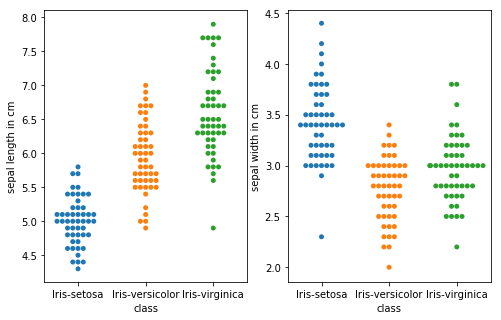

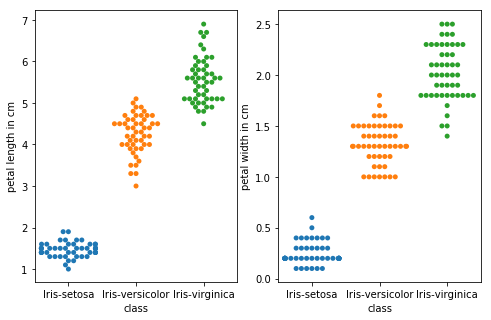

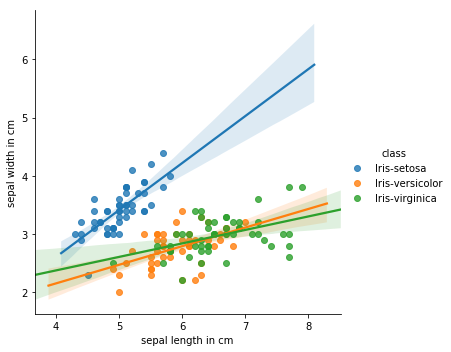

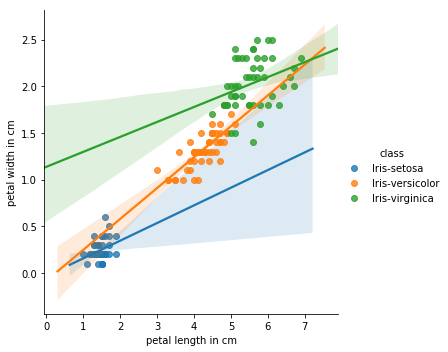

In [83]:
# 4. (2 points) Data inspection. Display the first 5 rows of the dataset and use any relevant functions that can help you to 
# understand the data. Prepare 2 scatter plots - sepal_width vs sepal_length and petal_width vs petal_length. Scatter plots 
# should show each class in different color (seaborn.lmplot is recommended for plotting).

f, axes = plt.subplots(1, 2, figsize = (8,5))

sns.swarmplot(x=iris['class'], y=iris['sepal length in cm'], data=iris, ax=axes[0])
sns.swarmplot(x=iris['class'], y=iris['sepal width in cm'], data=iris, ax=axes[1])

s, axes2 = plt.subplots(1, 2, figsize = (8,5))
sns.swarmplot(x=iris['class'], y=iris['petal length in cm'], data=iris, ax=axes2[0])
sns.swarmplot(x=iris['class'], y=iris['petal width in cm'], data=iris, ax=axes2[1])

sns.lmplot(x='sepal length in cm', y='sepal width in cm', hue='class', data=iris)
sns.lmplot(x='petal length in cm', y='petal width in cm', hue='class', data=iris)

iris.head()

In [118]:
# 5. (2 points) Prepare the data for classification. Using the pandas operators prepare the feature variables X and the response Y 
# for the fit. Note that sklean expects data as arrays, so convert extracted columns into arrays.

# Before proceeding with regression, first check if there are any missing values
iris.isnull().values.any()

# And the size of dataframe
iris.shape

iris['class'] = iris['class'].astype('category').cat.codes


# Converting extracted columns into arrays
X= iris.loc[:, 'sepal length in cm':'petal width in cm'].to_numpy()
Y= iris.loc[:,'class'].to_numpy()

X
Y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [123]:
# 6. (1 point) Split the data into train and test using sklearn train_test_split function.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) 

X_train.shape

(105, 4)

In [196]:
# 7. (2 points) Run the fit using KNeighborsClassifier from sklearn.neighbors. 
#    First, instantiate the model,
#    Then, run the classifier on the training set.

# KNN is a non-parametric and lazy learning algorithm. 
# the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions.
# The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. 
# Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. 
# Even number of K was used since the number of classes is odd.

neigh = KNeighborsClassifier(n_neighbors=10)

neigh.fit(X_train, Y_train)

neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [197]:
# 8. 3 points) Use learning model to predict the class from features, run prediction on X from test part.

#    Show the accuracy score of the prediction by comparing predicted iris classes and the Y values from the test.
#    Comparing these two arrays (predicted classes and test Y), count the numbers of correct predictions and predictions that were wrong. (HINTS: NumPy arrays can be compared using == operator. You can also use NumPy's operator count_nonzero to count number of non-False values).

Y_pred = neigh.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Y_test
Y_pred

c = Y_test == Y_pred

np.count_nonzero(c)




Accuracy: 0.9555555555555556


43

[0.868888888888889, 0.8688888888888888, 0.8800000000000001, 0.8622222222222222, 0.8800000000000001, 0.8600000000000001, 0.8333333333333334, 0.8444444444444444, 0.7955555555555558]
[39.1, 39.1, 39.6, 38.8, 39.6, 38.7, 37.5, 38.0, 35.8]


Text(0, 0.5, 'accuracy score')

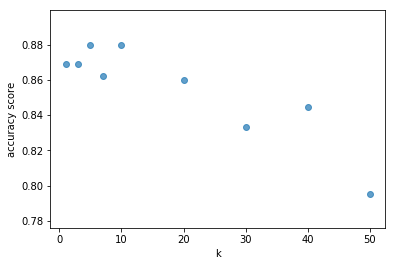

In [190]:
# 9. (4 points) In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors k. We will use the following number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:

#    Generate 10 random train/test splits for each value of k
#    Fit the model for each split and generate predictions
#    Average the accuracy score for each k
#    Calculate the average number of correct predictions for each k as well
#    Plot the accuracy score for different values of k. What conclusion can you make based on the graph?


k = [1, 3, 5, 7, 10, 20, 30, 40, 50]
accuracy = []
subtotal = 0
acc_avg = 0
acc_list_avg = []
count = 0
count_avg = 0
count_list_avg = []

for i in k:
    for j in range(9):
    
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=None)
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, Y_train)
    
        Y_pred = model.predict(X_test)
       
        accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
        subtotal += metrics.accuracy_score(Y_test, Y_pred)
        
        c = Y_test == Y_pred
        count += np.count_nonzero(c)

    acc_avg = subtotal/10
    acc_list_avg.append(acc_avg)
    
    count_avg = count/10
    count_list_avg.append(count_avg)
    
    subtotal = 0
    count = 0
    
print(acc_list_avg)
print(count_list_avg)

df = pd.DataFrame(data = acc_list_avg, columns = ['accuracy score'])
df['k'] = k

df

plt.scatter(df['k'], df['accuracy score'], alpha = 0.7, cmap='viridis')
plt.xlabel(df.columns.values[1])
plt.ylabel(df.columns.values[0])

In [ ]:
# As the result shown above, higher accuracy scores can be achieved from lower values of k which are between 1 to 10.
# When the k value is 10, the highest accuracy score was gained.